In [45]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [46]:
data = pd.read_csv('./penguins.csv')
data.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [47]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [48]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [49]:
print(data.groupby('island')['species'].value_counts())
print(data.groupby('sex')['species'].value_counts())

island     species  
Biscoe     Gentoo       124
           Adelie        44
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        52
Name: species, dtype: int64
sex     species  
female  Adelie       73
        Gentoo       58
        Chinstrap    34
male    Adelie       73
        Gentoo       61
        Chinstrap    34
Name: species, dtype: int64


In [50]:
data.drop('sex', axis=1, inplace=True)
data.drop('year', axis=1, inplace=True)
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0


In [51]:
data.isnull().sum()

species              0
island               0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [52]:
data.dropna(inplace=True)

In [53]:
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [54]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0


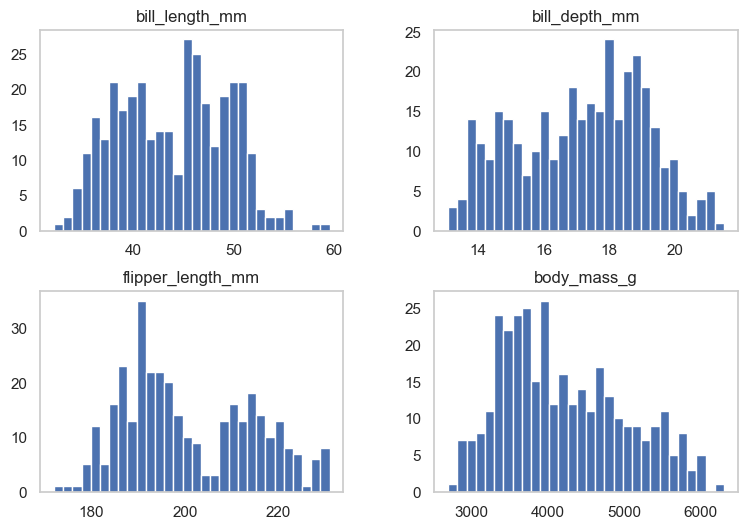

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
data.hist(bins=30, figsize=(9, 6), grid=False)
plt.show()

In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['island'] = label_encoder.fit_transform(data['island'])
data['species'] = label_encoder.fit_transform(data['species'])


In [57]:
X = data.drop(columns=['species'])
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,2,39.1,18.7,181.0,3750.0
1,2,39.5,17.4,186.0,3800.0
2,2,40.3,18.0,195.0,3250.0
4,2,36.7,19.3,193.0,3450.0
5,2,39.3,20.6,190.0,3650.0


In [58]:
y = data[['species']]
y.head()

,species
0,0
1,0
2,0
4,0
5,0


In [59]:
train_val_X, test_X, train_val_y, test_y = train_test_split(X, y, test_size=0.1, random_state=1)
train_X, val_X, train_y, val_y = train_test_split(train_val_X, train_val_y, test_size=2/9, random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
train_X_scaled = scaler_standard.fit_transform(train_X)
val_X_scaled = scaler_standard.transform(val_X)
test_X_scaled = scaler_standard.transform(test_X)

In [61]:
from keras.utils import to_categorical

train_y = to_categorical(train_y)
val_y = to_categorical(val_y)
test_y = to_categorical(test_y) 

In [62]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

n_cols_2 = train_X.shape[1]

model.add(Dense(5, activation='relu', input_shape=(n_cols_2,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [63]:
import keras
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [64]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=3)
fithistory1 = model.fit(train_X_scaled, train_y, validation_data=(val_X_scaled, val_y), epochs=60, callbacks=[early_stopping_monitor], verbose=1)

Epoch 1/60
8/8 [==============================] - 2s 80ms/step - loss: 0.8723 - accuracy: 0.5504 - val_loss: 0.8265 - val_accuracy: 0.7246
Epoch 2/60
8/8 [==============================] - 0s 21ms/step - loss: 0.7333 - accuracy: 0.7647 - val_loss: 0.7187 - val_accuracy: 0.8406
Epoch 3/60
8/8 [==============================] - 0s 18ms/step - loss: 0.6262 - accuracy: 0.8403 - val_loss: 0.6126 - val_accuracy: 0.8986
Epoch 4/60
8/8 [==============================] - 0s 16ms/step - loss: 0.5329 - accuracy: 0.9160 - val_loss: 0.5156 - val_accuracy: 0.9420
Epoch 5/60
8/8 [==============================] - 0s 16ms/step - loss: 0.4487 - accuracy: 0.8950 - val_loss: 0.4198 - val_accuracy: 0.9130
Epoch 6/60
8/8 [==============================] - 0s 13ms/step - loss: 0.3589 - accuracy: 0.9034 - val_loss: 0.3140 - val_accuracy: 0.9420
Epoch 7/60
8/8 [==============================] - 0s 15ms/step - loss: 0.2583 - accuracy: 0.9580 - val_loss: 0.2367 - val_accuracy: 0.9855
Epoch 8/60
8/8 [===========

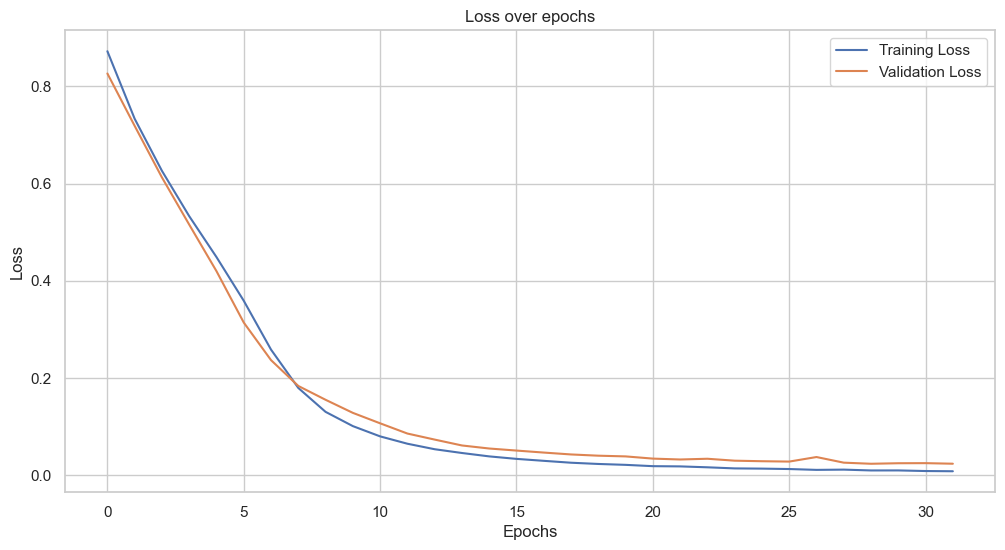

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(fithistory1.history['loss'], label='Training Loss')
plt.plot(fithistory1.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

2/2 [==============================] - 0s 7ms/step


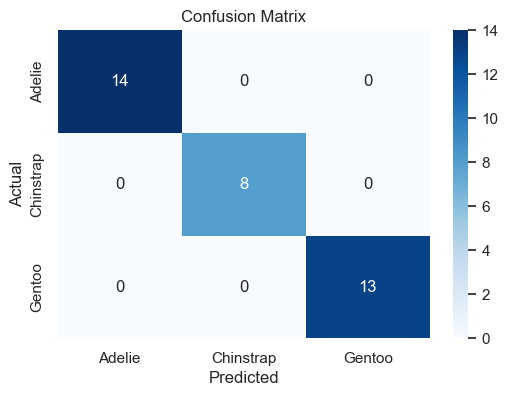

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_X_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  
test_y_classes = np.argmax(test_y, axis=1)  

cm = confusion_matrix(test_y_classes, y_pred_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,  
            yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
